In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.special import legendre, factorial
from scipy.integrate import quad
from pandas import *
%matplotlib notebook


In [2]:
x=sp.Symbol('x')
x11=np.array([sp.nsolve(sp.cos(x)*sp.cosh(x)-1,x,np.pi/2+np.pi*i) for i in range(1,7)],dtype='float')
k1=np.array([x11[i]/2 for i in range(6)])


In [3]:
x11

array([  4.73004074,   7.85320462,  10.99560784,  14.13716549,
        17.27875966,  20.42035225])

In [6]:
x2=np.array([np.pi/2+np.pi*i for i in range(1,11)])
#k2=np.array([x2[i]/2 for i in range(10)])
#x2

In [7]:
m=40.
EI=20.
b=0.5

In [8]:
#xx=(np.sqrt(EI/(8*m*pow(b,3))))*(2*x1*b)**2
xxx=(np.sqrt(EI/(8*m*pow(b,3))))*(2*x2*b)**2
xx=(x11/2)**2*np.sqrt(EI/m)
xx

array([  3.95507546,  10.90231782,  21.37290204,  35.33049276,
        52.77766089,  73.71425309])

In [9]:
t=np.linspace(0,1,100)
tt=np.linspace(-1,1,100)

In [10]:
def frecuencia(n,x1):
    A=np.sinh(x1[n]*t)+np.sin(x1[n]*t)
    B=np.sin(x1[n])-np.sinh(x1[n])
    C=np.cos(x1[n])-np.cosh(x1[n])
    D=np.cosh(x1[n]*t)+np.cos(x1[n]*t)
    w=0.5*(A-(B/C)*D)
    return w

<IPython.core.display.Javascript object>


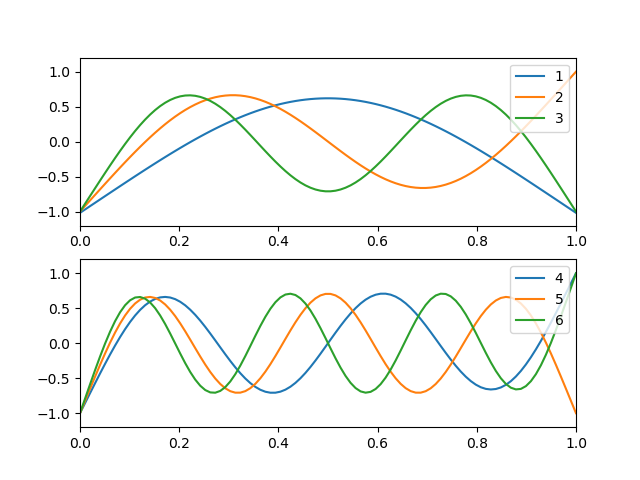

(-1.2, 1.2)

In [11]:
plt.figure()
plt.subplot(211)
for i in range(0,3):
    plt.plot(t,frecuencia(i,x11), label=i+1)
plt.legend(loc='upper right')
plt.xlim(0,1)
plt.ylim(-1.2,1.2)
plt.subplot(212)
for i in range(3,6):
    plt.plot(t,frecuencia(i,x11), label=i+1)
plt.legend(loc='upper right')
plt.xlim(0,1)
plt.ylim(-1.2,1.2)

In [16]:
np.max(frecuencia(0,x11))

0.61841657383717186

In [12]:
n = int(input(""))
l=np.array([legendre(i+2) for i in range(n)])
ld=np.array([np.polyder(legendre(i+2),2) for i in range(n)])
ldT=ld[:,np.newaxis]
lT=l[:,np.newaxis]
tol=1e-10
In = np.zeros((n,n))
Kn = np.zeros((n,n)) 
mm=l*m*lT
mmm=ld*EI*ldT
for i in range(n):    
    for j in range(n):
        In[i,j]=quad(mm[i,j], -1,1)[0]
        Kn[i,j]=quad(mmm[i,j],-1,1)[0]

        
        
        
for k in range(n):
    for kk in range(n):
        if np.abs(In[k,kk])<tol:
            In[k,kk]=0
        if np.abs(Kn[k,kk])<tol:
            Kn[k,kk]=0
                
I=np.eye(len(In))            
pp1=la.block_diag(np.asarray(I),np.asarray(In))
pp2=np.bmat([[np.zeros_like(I),I],[-Kn,np.zeros_like(I)]])

10


C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [13]:
λ,v=la.eig(pp2,pp1)

In [15]:
def autovalor(n):
    if n>1:
        l=np.array([legendre(i+2) for i in range(n)])
        ld=np.array([np.polyder(legendre(i+2),2) for i in range(n)])
        ldT=ld[:,np.newaxis]
        lT=l[:,np.newaxis]
        
        mm=lT*m*l
        mmm=ldT*EI*ld
    In = np.zeros((n,n))
    Kn = np.zeros((n,n)) 
    
    for i in range(n):    
        for j in range(n):
            In[i,j]=quad(mm[i,j], -1,1)[0]
            Kn[i,j]=quad(mmm[i,j],-1,1)[0]

        
        
    tol=1e-10    
    for k in range(n):
        for kk in range(n):
            if np.abs(In[k,kk])<tol:
                In[k,kk]=0
            if np.abs(Kn[k,kk])<tol:
                Kn[k,kk]=0
                
    I=np.eye(len(In))            
    pp1=la.block_diag(np.asarray(I), np.asarray(In))
    pp2=np.bmat([[np.zeros_like(I),I],[-Kn,np.zeros_like(I)]])
    ppp=la.inv(pp1)*pp2
    autovalor=la.eig(pp2,pp1)[0]
    v=la.eig(pp2,pp1)[1]
    #return np.sort(autovalor.imag[::2]),v[n:]
    return autovalor,v

In [16]:
DataFrame(autovalor(6)[1])

C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


,0,1,2,3,4,5,6,7,8,9,10,11
0,(-0-5.35212030973e-05j),5.35212030973e-05j,-0.00267216777767j,0.00267216777767j,-0.243578558898j,0.243578558898j,9.40848974672e-21j,-9.40848974672e-21j,2.59722671337e-18j,-2.59722671337e-18j,6.95867263293e-18j,-6.95867263293e-18j
1,(-0+0j),0j,0j,-0j,0j,-0j,0.000104502941125j,-0.000104502941125j,0.00401462223726j,-0.00401462223726j,0.0883063535026j,-0.0883063535026j
2,(-0-0.00126890267394j),0.00126890267394j,-0.0420922262647j,0.0420922262647j,0.0273714443265j,-0.0273714443265j,2.24823777202e-19j,-2.24823777202e-19j,5.33255810472e-17j,-5.33255810472e-17j,4.65105101937e-17j,-4.65105101937e-17j
3,(-0+0j),0j,0j,-0j,0j,-0j,0.00100554919182j,-0.00100554919182j,0.0233559267363j,-0.0233559267363j,-0.0230604463034j,0.0230604463034j
4,(-0-0.00669845569081j),0.00669845569081j,0.0115729628974j,-0.0115729628974j,-0.00242933665794j,0.00242933665794j,3.51575515264e-18j,-3.51575515264e-18j,3.22660885669e-19j,-3.22660885669e-19j,-1.78878159873e-17j,1.78878159873e-17j
5,(-0-1.26540762654e-17j),1.26540762654e-17j,6.18404928126e-16j,-6.18404928126e-16j,-3.79500269032e-16j,3.79500269032e-16j,0.00393198738267j,-0.00393198738267j,-0.00837356224329j,0.00837356224329j,0.00301264731895j,-0.00301264731895j
6,(0.00785004287802+0j),(0.00785004287802-0j),(0.0610393405662+0j),(0.0610393405662-0j),(0.963380743234+0j),(0.963380743234-0j),(-2.31741496994e-18+0j),(-2.31741496994e-18+0j),(-1.03301312505e-16+0j),(-1.03301312505e-16+0j),(-7.58847292799e-17+0j),(-7.58847292799e-17+0j)
7,(1.22294620463e-16+0j),(1.22294620463e-16-0j),(-3.8375133478e-14+0j),(-3.8375133478e-14+0j),(1.360116945e-13+0j),(1.360116945e-13-0j),(-0.0257402289986+0j),(-0.0257402289986+0j),(-0.159676374876+0j),(-0.159676374876+0j),(-0.962985914516+0j),(-0.962985914516+0j)
8,(0.186112041995+0j),(0.186112041995-0j),(0.961497161827+0j),(0.961497161827-0j),(-0.108257157354+0j),(-0.108257157354+0j),(-5.53765802256e-17+0j),(-5.53765802256e-17+0j),(-2.12095558848e-15+0j),(-2.12095558848e-15+0j),(-5.07199815381e-16+0j),(-5.07199815381e-16+0j)
9,(1.19576962231e-15+0j),(1.19576962231e-15-0j),(-3.7522352734e-13+0j),(-3.7522352734e-13+0j),(1.329892124e-12+0j),(1.329892124e-12-0j),(-0.247677875744+0j),(-0.247677875744+0j),(-0.928951590638+0j),(-0.928951590638+0j),(0.251475506482+0j),(0.251475506482-0j)


In [17]:
autovalor(8)[0]

C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


array([ 0.+389.13999238j,  0.-389.13999238j,  0.+586.02724968j,
        0.-586.02724968j,  0. +63.41206264j,  0. -63.41206264j,
        0. +21.40873704j,  0. -21.40873704j,  0.  +3.95507552j,
        0.  -3.95507552j,  0. +95.47207223j,  0. -95.47207223j,
        0. +35.54272426j,  0. -35.54272426j,  0. +10.90233032j,
        0. -10.90233032j])

In [18]:
x1=np.poly1d(l[0]*autovalor(8)[1][0,8].imag)
for i in range(7):
    x1+=(np.poly1d(l[1+i]*autovalor(8)[1][i+1,8].imag))

C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [19]:
x2=np.poly1d(l[0]*autovalor(8)[1][0,14].imag)
for i in range(7):
    x2+=(np.poly1d(l[1+i]*autovalor(8)[1][i+1,14].imag))

C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [20]:
x3=np.poly1d(l[0]*autovalor(8)[1][0,7].imag)
for i in range(7):
    x3+=(np.poly1d(l[1+i]*autovalor(8)[1][i+1,7].imag))

C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [21]:
x4=np.poly1d(l[0]*autovalor(8)[1][0,12].imag)
for i in range(7):
    x4+=(np.poly1d(l[1+i]*autovalor(8)[1][i+1,12].imag))

C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [22]:
x5=np.poly1d(l[0]*autovalor(8)[1][0,4].imag)
for i in range(7):
    x5+=(np.poly1d(l[1+i]*autovalor(8)[1][i+1,4].imag))

C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [23]:
x6=np.poly1d(l[0]*autovalor(8)[1][0,10].imag)
for i in range(7):
    x6+=(np.poly1d(l[1+i]*autovalor(8)[1][i+1,10].imag))

C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


<IPython.core.display.Javascript object>


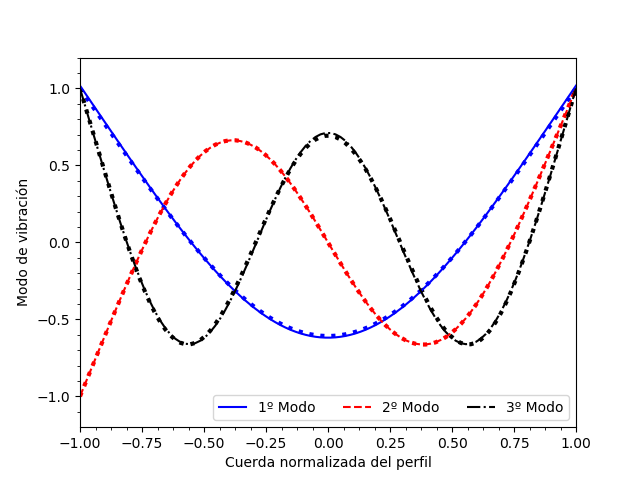

In [28]:
plt.figure()
plt.plot(tt,x1(2*t-1)/x1(2*t-1)[0],linestyle=':',linewidth=3,color='b')
plt.plot(tt,-x2(2*t-1)/x2(2*t-1)[0],linestyle=':',linewidth=3,color='r')
plt.plot(tt,x3(2*t-1)/x3(2*t-1)[0],linestyle=':',linewidth=3,color='black')
plt.plot(tt,-frecuencia(0,x11),color='b',label='1º Modo')
plt.plot(tt,frecuencia(1,x11),color='r',label='2º Modo',linestyle='--')
plt.plot(tt,-frecuencia(2,x11),color='black',label='3º Modo',linestyle='-.')
plt.xlim(-1,1)
plt.ylim(-1.2,1.2)
plt.legend(ncol=3,loc='lower right')
plt.xlabel('Cuerda normalizada del perfil')
plt.ylabel('Modo de vibración')
plt.minorticks_on()
plt.savefig('5',dpi=300)

<IPython.core.display.Javascript object>


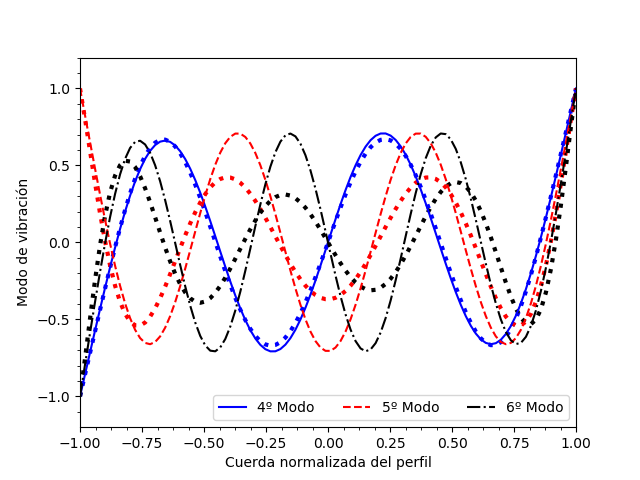

In [29]:
plt.figure()
plt.plot(tt,-x4(2*t-1)/x4(2*t-1)[0],linestyle=':',linewidth=3,color='b')
plt.plot(tt,x5(2*t-1)/x5(2*t-1)[0],linestyle=':',linewidth=3,color='r')
plt.plot(tt,-x6(2*t-1)/x6(2*t-1)[0],linestyle=':',linewidth=3,color='black')
plt.plot(tt,frecuencia(3,x11),color='b',label='4º Modo')
plt.plot(tt,-frecuencia(4,x11),color='r',label='5º Modo',linestyle='--')
plt.plot(tt,frecuencia(5,x11),color='black',label='6º Modo',linestyle='-.')
plt.xlim(-1,1)
plt.ylim(-1.2,1.2)
plt.legend(ncol=3,loc='lower right')
plt.xlabel('Cuerda normalizada del perfil')
plt.ylabel('Modo de vibración')
plt.minorticks_on()
plt.savefig('6',dpi=300)

In [30]:
def vector(n):
    v=np.zeros(n)
    for i in range(n):
        v[i]=np.sum(autovalor(n)[1][i].real)/2
    return v

In [31]:
sol=np.zeros((11,10))
for i in range(9):
    sol[i+1,0:len(autovalor(i+2)[0][::2].imag)]=np.sort(autovalor(i+2)[0][::2].imag)
sol[0,0]=autovalor(2)[0][0].imag
sol[10,0:len(xx)]=xx
sol[10,len(xx):]=xxx[len(xx):]
DataFrame(sol)

C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


,0,1,2,3,4,5,6,7,8,9
0,4.743416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.743416,16.201852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.988826,16.201852,39.485304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.988826,11.231916,39.485304,80.553362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.955113,11.231916,22.842630,80.553362,146.671645,0.000000,0.000000,0.000000,0.000000,0.000000
5,3.955113,10.905058,22.842630,39.773699,146.671645,246.311048,0.000000,0.000000,0.000000,0.000000
6,3.955076,10.905058,21.408737,39.773699,63.412063,246.311048,389.139992,0.000000,0.000000,0.000000
7,3.955076,10.902330,21.408737,35.542724,63.412063,95.472072,389.139992,586.027250,0.000000,0.000000
8,3.955075,10.902330,21.373299,35.542724,53.580678,95.472072,137.921256,586.027250,849.044685,0.000000
9,3.955075,10.902318,21.373299,35.335220,53.580678,75.998293,137.921256,192.928355,849.044685,1191.468829
